<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/CNN_Cats_vs_Dogs_Classification/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  91.4M      0 --:--:-- --:--:-- --:--:-- 91.3M
Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
datagen = ImageDataGenerator(
      rotation_range = 50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=None,
      shear_range=0.2,
      zoom_range=0.2,
      channel_shift_range=0.2,
      fill_mode='nearest',
      horizontal_flip=True,
      vertical_flip=True,
  )

In [23]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [24]:
classes = ['Cat', 'Dog']

In [25]:
le = LabelEncoder()

In [26]:
def process_data(img_size=(32,32)):

  local_x = []
  local_y = []

  for i in range(len(os.listdir(train_dir))):
    dir = os.path.join(train_dir, os.listdir(train_dir)[i])
    for j in range(len(os.listdir(dir))):
      img = cv2.imread(os.path.join(dir, os.listdir(dir)[j]))
      img_resized = cv2.resize(img, img_size)
      local_x.append(img_resized)
      local_y.append(os.listdir(train_dir)[i])

  local_x = np.array(local_x)
  local_x = local_x / 255.0
  local_y = np.array(local_y)
  encoded_y = le.fit_transform(local_y)

  x_train,x_test, y_train, y_test =train_test_split(local_x, encoded_y, test_size=0.2)
  return x_train, x_test, y_train, y_test

In [27]:
def show_images(x, y, y_pred, n=100):
  plt.figure(figsize=(20,16))
  for i in range(n):
    plt.subplot(10, 20, i+1)
    plt.imshow(x[i])
    if len(y_pred) > 0:
      plt.title(f' {classes[y_pred[i]]} ({classes[y[i]]})')
    else:
      plt.title(f'{classes[y[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [28]:
x_train, x_test, y_train, y_test = process_data((32,32))

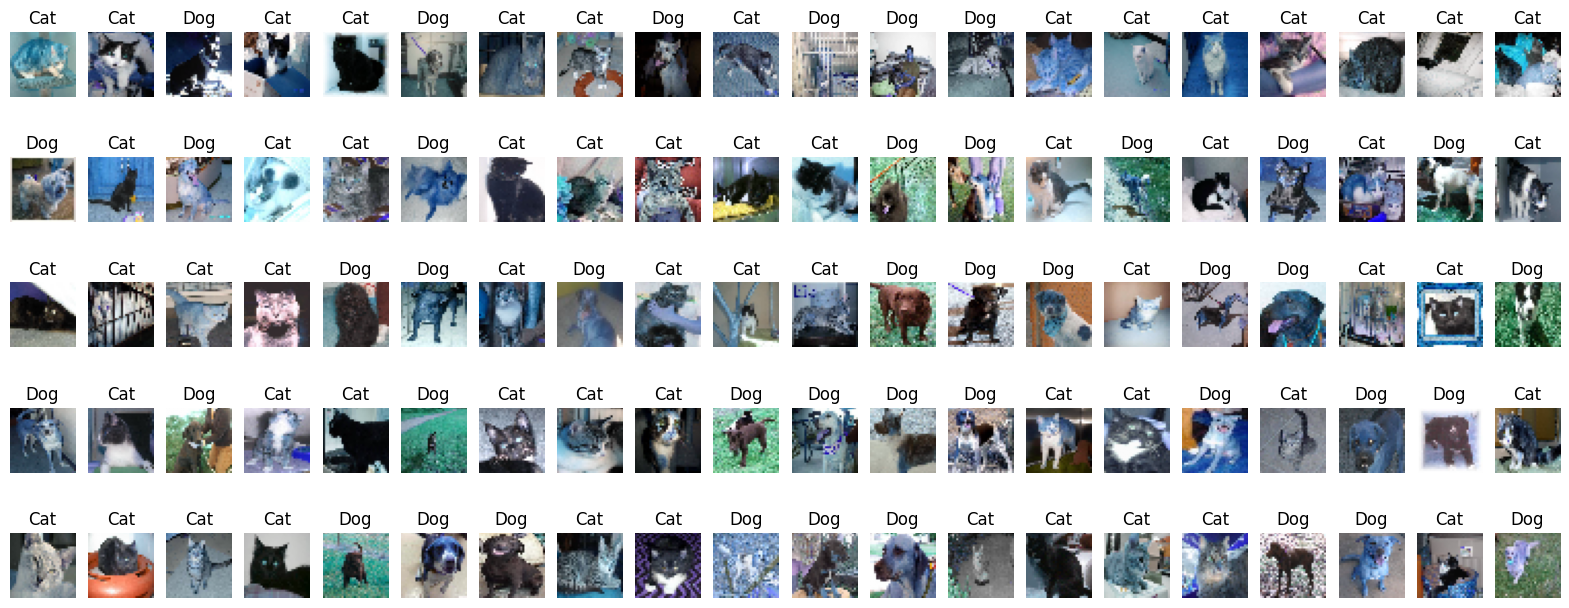

In [29]:
show_images(x_train,y_train, [] )

In [30]:
def evalute_model(y, y_pred):
  result = np.argmax(y_pred, axis=1)
  print(accuracy_score(y, result))

In [50]:
cf100_model = tf.keras.models.load_model('/content/cf100.h5')
# cf100_model.trainable = False
cf100_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,243,628 (8.56 MB)

 Trainable params: 2,242,730 (8.56 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

In [55]:
def train_model(x_train, y_train, x_test, y_test, epochs=20):
  model = tf.keras.Sequential([
    cf100_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])
  model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
  model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=epochs, validation_data = (x_test, y_test))

In [57]:
train_model(x_train, y_train, x_test, y_test, epochs=20)
# evalute_model(y_test, y_pred)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.6551 - loss: 0.6349 - val_accuracy: 0.6825 - val_loss: 0.6357
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7063 - loss: 0.5991 - val_accuracy: 0.6400 - val_loss: 0.6138
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6817 - loss: 0.6016 - val_accuracy: 0.6800 - val_loss: 0.6241
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6904 - loss: 0.6131 - val_accuracy: 0.5975 - val_loss: 0.7123
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7039 - loss: 0.5848 - val_accuracy: 0.5575 - val_loss: 0.7896
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6705 - loss: 0.6119 - val_accuracy: 0.5925 - val_loss: 0.6841
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6790 - loss: 0.5949 - val_accuracy: 0.6400 - val_loss: 0.6266
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7273 - loss: 0.5611 - val_accuracy: 0.6775 - 